<a href="https://colab.research.google.com/github/ZebaFatima639/Data-Cleaning-Data-Preprocessing/blob/main/Decision_Tree_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:

#handling duplicates
data_duplicated = data.duplicated().any()

In [ ]:
data_duplicated

np.True_

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_duplicated = data.duplicated().any()
data_duplicated

np.False_

In [ ]:
#data processing
cate_val = []
contin_val = []
for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        contin_val.append(column)

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
contin_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
#encoding categorical data
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
cate_val.remove('target')
cate_val.remove('sex')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[contin_val] = sc.fit_transform(data[contin_val])

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
#splitting the dataset into train set and test set
X = data.drop(columns=['target'])
y = data['target']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [ ]:
y_train

,target
163,0
291,0
280,1
85,1
239,0
...,...
267,0
77,0
125,1
522,1


In [ ]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [ ]:
y_test

,target
245,1
349,0
135,0
389,1
66,1
...,...
402,1
123,1
739,0
274,1


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Logistic Regression Accuracy:", accuracy_score(y_test,y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test,y_pred))

Logistic Regression Accuracy: 0.7868852459016393
Logistic Regression Confusion Matrix:
 [[24  8]
 [ 5 24]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
from math import log
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.7868852459016393

In [ ]:
confusion_matrix(y_test,y_pred)

array([[24,  8],
       [ 5, 24]])

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.75      0.79        32\n           1       0.75      0.83      0.79        29\n\n    accuracy                           0.79        61\n   macro avg       0.79      0.79      0.79        61\nweighted avg       0.79      0.79      0.79        61\n'

In [ ]:
#SVC (SUPPORT VECTOR CLASSIFIER) /svm
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred1 = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test,y_pred1))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test,y_pred1))
print("SVC Classification Report:\n", classification_report(y_test,y_pred1))

SVC Accuracy: 0.8032786885245902
SVC Confusion Matrix:
 [[24  8]
 [ 4 25]]
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
y_pred1 = svc.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8032786885245902

KNeighbour classifier

In [ ]:
#KNeighbour classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test,y_pred2))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test,y_pred2))
print("KNN Classification Report:\n", classification_report(y_test,y_pred2))

KNN Accuracy: 0.7377049180327869
KNN Confusion Matrix:
 [[20 12]
 [ 4 25]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71        32
           1       0.68      0.86      0.76        29

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.76      0.74      0.73        61



In [ ]:
y_pred2 = knn.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7377049180327869

In [ ]:
score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [ ]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("KNN (n=2) Accuracy:", accuracy_score(y_test,y_pred))
print("KNN (n=2) Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("KNN (n=2) Classification Report:\n", classification_report(y_test,y_pred))

KNN (n=2) Accuracy: 0.8032786885245902
KNN (n=2) Confusion Matrix:
 [[27  5]
 [ 7 22]]
KNN (n=2) Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.81      0.76      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



NON LINEAR ML ALGORITHMS

In [ ]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(302, 14)

In [ ]:
X = data.drop(columns=['target'])
y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred3 = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test,y_pred3))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test,y_pred3))
print("Decision Tree Classification Report:\n", classification_report(y_test,y_pred3))

Decision Tree Accuracy: 0.7377049180327869
Decision Tree Confusion Matrix:
 [[25  7]
 [ 9 20]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
y_pred3 = dt.predict(X_test)
accuracy_score(y_test,y_pred3)

0.7377049180327869

RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test,y_pred4))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test,y_pred4))
print("Random Forest Classification Report:\n", classification_report(y_test,y_pred4))

Random Forest Accuracy: 0.8360655737704918
Random Forest Confusion Matrix:
 [[25  7]
 [ 3 26]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
y_pred4 = rf.predict(X_test)
accuracy_score(y_test,y_pred4)

0.8360655737704918

GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred5 = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test,y_pred5))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test,y_pred5))
print("Gradient Boosting Classification Report:\n", classification_report(y_test,y_pred5))

Gradient Boosting Accuracy: 0.8032786885245902
Gradient Boosting Confusion Matrix:
 [[24  8]
 [ 4 25]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
y_pred5 = gb.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8032786885245902

In [ ]:
final_models = pd.DataFrame({'Models':['Logistic Regression','SVC','KNN','Decision Tree','Random Forest','Gradient Boosting'],
                             'ACC':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]})

In [ ]:
final_models

,Models,ACC
0,Logistic Regression,0.803279
1,SVC,0.803279
2,KNN,0.737705
3,Decision Tree,0.737705
4,Random Forest,0.836066
5,Gradient Boosting,0.803279


from matplotlib import pyplot as plt
final_models['ACC'].plot(kind='hist', bins=20, title='ACC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
final_models.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
final_models['ACC'].plot(kind='line', figsize=(8, 4), title='ACC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(final_models['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_models, x='ACC', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: ylabel='Models'>

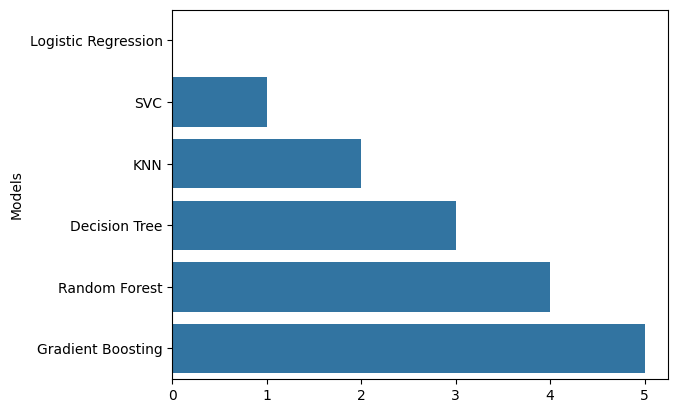

In [ ]:
sns.barplot(final_models['Models'])

<Axes: ylabel='ACC'>

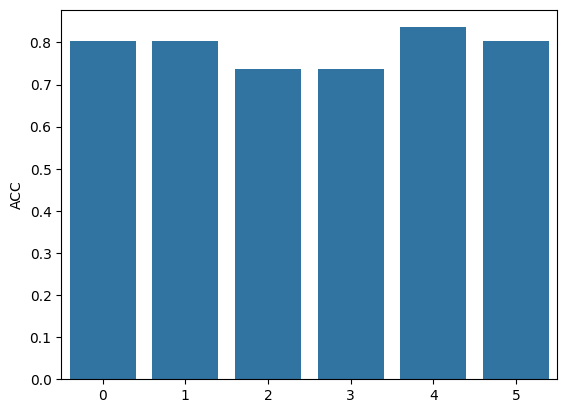

In [ ]:
sns.barplot(final_models['ACC'])

In [ ]:
X = data.drop(columns=['target'])
y = data['target']
X.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

PREDICTION ON NEW DATA

In [ ]:
new_data = pd.DataFrame({'age':52,
                         'sex':1,
                         'cp':0,
                         'trestbps':125,
                         'chol':212,
                         'fbs':0, # Corrected from 'fba' to 'fbs'
                         'restecg':1,
                         'thalach':168,
                         'exang':0,
                         'oldpeak':1.0,
                         'slope':2,
                         'ca':2,
                         'thal':3},index=[0])

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [190]:
p = rf.predict(new_data)
if p[0]==0:
    print('Person does not have Heart Disease')
else:
    print('Person has Heart Disease')

Person does not have Heart Disease
